📊 EDA Ideas:
Univariate Analysis:

Most frequently exported products

Most active export companies

Most frequent export destinations

Transportation mode distribution

Bivariate Analysis:

Export Value vs. Units Sold

Profit per Unit by Product

Export Value by Destination Port

Average Unit Price per Product

Time Analysis:

Number of exports by year/month

Value trends over time

Group Analysis:

Total profit by company

Top export destinations by export value

📌 Possible Questions:
Which product generated the highest total export value?

Which company had the highest average profit per unit?

What’s the most profitable export destination?

Which transportation mode is most commonly used for high-value exports?

📎 Quick Tips:
Convert Date to datetime format

Group by Product, Company, or Export Country for summaries

Use Seaborn or Matplotlib for visualizations like bar charts, line plots, pie charts

Would you like me to prep a ready-to-run EDA notebook outline for you based on this dataset? 🚀









📌 EDA Questions for the Nigeria Export Dataset
📊 General Trends:
What are the top 5 most exported products by total export value?

Which company exported the highest number of units overall?

Which export country received the most Nigerian products by volume?

Which transportation mode is most commonly used for exports?

Which port handled the highest total export value?

📈 Profitability & Pricing:
Which product has the highest average profit per unit?

Which company had the highest average unit price for its exports?

What is the relationship between units sold and export value?

Which product contributed the most to total profits?

Which destination country resulted in the highest average profit per unit?

📅 Time-Based Analysis:
How did the total number of exports change over time (monthly or yearly)?

Which month had the highest total export value?

What product was most frequently exported each year?

How has the average unit price for each product changed over time?

📊 Product-Company Relationships:
Which company is the biggest exporter for each product?

Which company earned the highest profit per unit on average?

How does export value vary across different companies for the same product?

🌍 Export Destinations:
Which country imported the highest number of different products?

What is the average export value per country?

Which product is most popular in each export country?


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load the Dataset
data = pd.read_csv('nigeria_agricultural_exports.csv')
data.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [3]:
#Check for Missing Values
data.isnull().sum()

Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64

In [4]:
#Check for Duplicate Rows
data.duplicated().sum()

0

In [ ]:
# Check the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         1000 non-null   object 
 1   Company              1000 non-null   object 
 2   Export Country       1000 non-null   object 
 3   Date                 1000 non-null   object 
 4   Units Sold           1000 non-null   int64  
 5   unit_price           1000 non-null   float64
 6   Profit per unit      1000 non-null   float64
 7   Export Value         1000 non-null   float64
 8   Destination Port     1000 non-null   object 
 9   Transportation Mode  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [8]:
# convert Date column to Datetime
data["Date"] = pd.to_datetime(data['Date'])
data.info() # Confirm the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Name         1000 non-null   object        
 1   Company              1000 non-null   object        
 2   Export Country       1000 non-null   object        
 3   Date                 1000 non-null   datetime64[ns]
 4   Units Sold           1000 non-null   int64         
 5   unit_price           1000 non-null   float64       
 6   Profit per unit      1000 non-null   float64       
 7   Export Value         1000 non-null   float64       
 8   Destination Port     1000 non-null   object        
 9   Transportation Mode  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.3+ KB


In [10]:
# Get summary statistics for numerical columns
data.describe()

,Date,Units Sold,unit_price,Profit per unit,Export Value
count,1000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2021-12-30 07:03:21.599999744,536.804000,30010.266660,6125.299550,1.631766e+07
min,2020-01-05 00:00:00,103.000000,10006.540000,2000.300000,1.323777e+06
25%,2021-01-03 00:00:00,322.750000,20013.620000,4261.327500,7.669552e+06
50%,2021-12-25 00:00:00,519.000000,30082.600000,6132.150000,1.441451e+07
75%,2022-12-31 00:00:00,743.250000,39955.005000,8038.315000,2.262969e+07
max,2023-12-30 00:00:00,999.000000,49985.860000,9990.570000,4.712082e+07
std,NaN,251.311112,11515.423486,2269.844681,1.028734e+07


Dataset Summary Insights
Date Range: From January 5, 2020, to December 30, 2023, covering almost 4 years of export data.

Units Sold: On average, about 537 units per export deal, ranging from 103 to 999 units.

Unit Price: The average price per unit is around 30,010, with a minimum of ~10,007 and a maximum close to 49,986.

Profit per Unit: Average profit per unit stands at about 6,125, ranging from 2,000 to just under 10,000.

Export Value: The total value per deal averages around 16.3 million, with a minimum of ~1.3 million and a maximum exceeding 47 million.

Standard Deviation: Shows a significant spread in units sold, unit price, profit, and export value, indicating variability in deal sizes and profitability.

In [21]:
numerical_cols = ['Units Sold', 'unit_price', 'Profit per unit', 'Export Value']

# Calculate mean, median, mode, std for each numerical column
stats_summary = {}

for col in numerical_cols:
    mean_val = data[col].mean()
    median_val = data[col].median()
    mode_val = data[col].mode().iloc[0]  # mode can return multiple values, take the first
    std_val = data[col].std()
    
    stats_summary[col] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val,
        'Standard Deviation': std_val
    }

# Convert the dictionary to a DataFrame for better display
stats_df = pd.DataFrame(stats_summary).T
print(stats_df)


                         Mean       Median       Mode  Standard Deviation
Units Sold       5.368040e+02       519.00      662.0        2.513111e+02
unit_price       3.001027e+04     30082.60    32503.8        1.151542e+04
Profit per unit  6.125300e+03      6132.15     2000.3        2.269845e+03
Export Value     1.631766e+07  14414511.42  1323776.6        1.028734e+07


Units Sold:
Mean is about 537 units, median is 519, and mode is 662. The standard deviation (251) shows moderate variation in how many units are sold per transaction.

unit_price:
The average price per unit is roughly 30,010, with a median close to that at 30,082. The mode (32,503.8) indicates the most frequently occurring price point. The high standard deviation (~11,515) suggests quite a wide range in pricing.

Profit per unit:
Average profit is around 6,125, median about 6,132, but the mode is surprisingly low at 2,000.3, possibly indicating many low-profit transactions. Std dev (~2,270) shows some spread in profit per unit.

Export Value:
Mean export value is about 16.3 million, median ~14.4 million, but mode is much lower (~1.3 million), implying many smaller deals but a few large ones drive the average up. The large std dev (~10.3 million) confirms high variability in export values

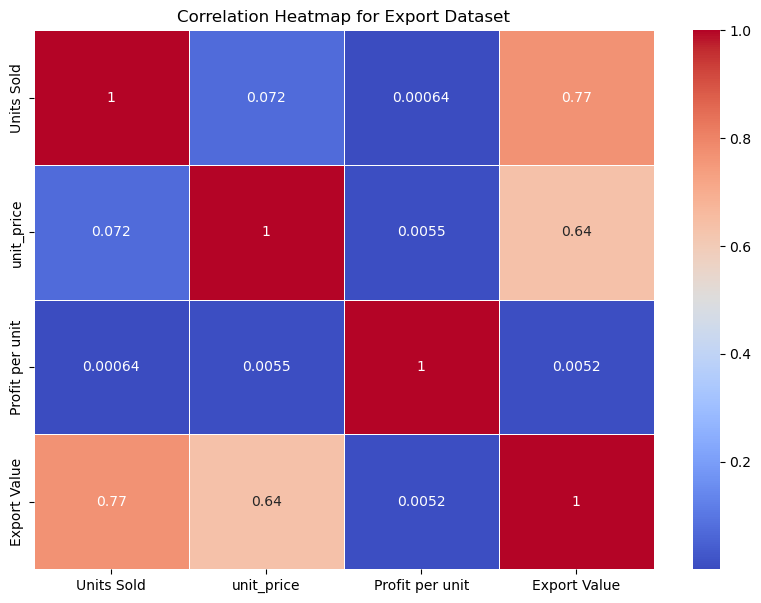

In [22]:


# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Export Dataset')
plt.show()


 📊 Correlation Insights

Strong positive correlation between Units Sold and Export Value (0.77)
The more units sold, the higher the export value.

Moderate positive correlation between Unit Price and Export Value (0.64)
Higher unit prices tend to increase export value too, though not as strongly as quantity.

Profit per Unit shows very weak correlation with other variables
The values around 0.005–0.006 indicate almost no linear relationship with Units Sold, Unit Price, or Export Value.
Suggests Profit per Unit may be influenced by other factors outside this dataset 
(e.g. operational costs, transport fees, export taxes).

Very weak positive correlation between Units Sold and Unit Price (0.072)
Slight tendency for higher sales with higher prices, but practically negligible.

📌 Conclusion:
# 🔍 Export Value is primarily driven by Units Sold and Unit Price.
# 💡 Profit per Unit behaves independently and likely depends on unrecorded operational factors.


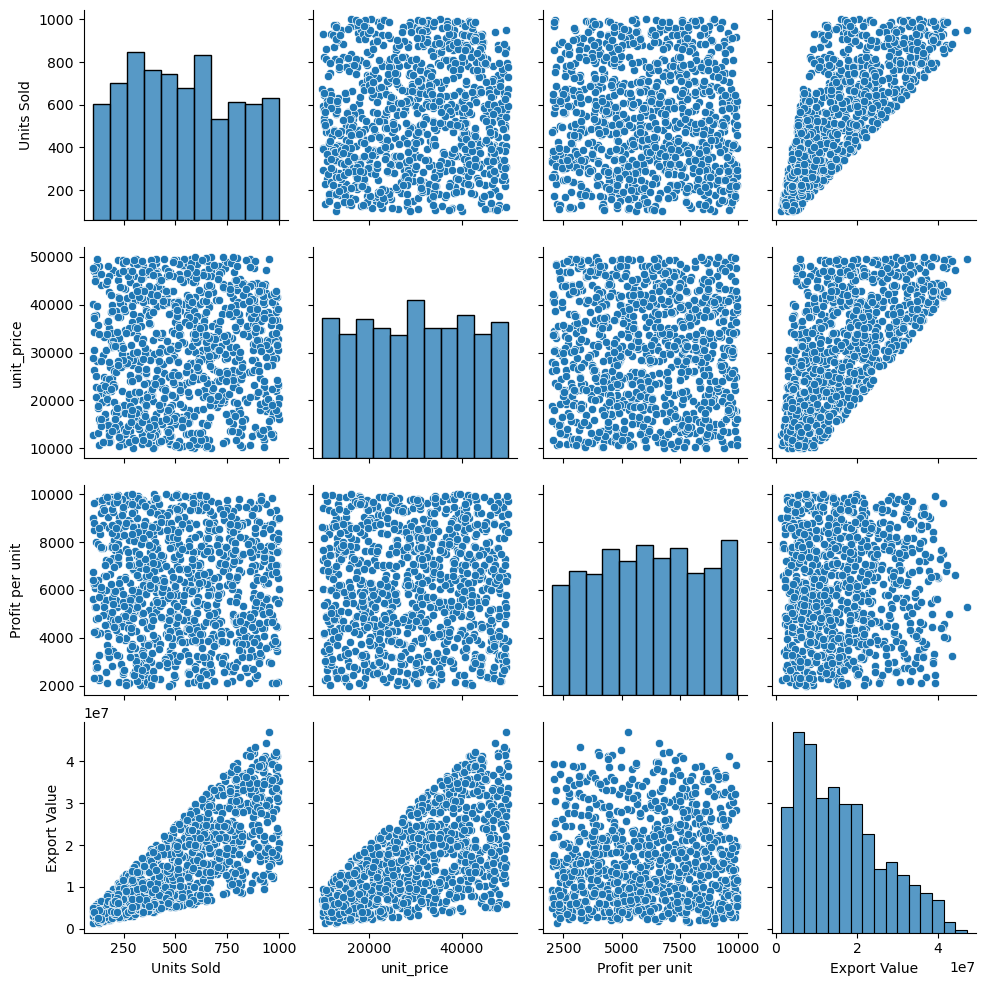

In [14]:


# Pair plot of numerical columns
sns.pairplot(data)
plt.show()


In [23]:
# Check unique values in each column
data.nunique()

Product Name              8
Company                  10
Export Country           10
Date                    739
Units Sold              609
unit_price              999
Profit per unit        1000
Export Value           1000
Destination Port          4
Transportation Mode       1
dtype: int64

In [24]:
# Check for uniques values
for col in ['Product Name', 'Company', 'Export Country', 'Destination Port', 'Transportation Mode']:
    print(f"{col}:")
    print(data[col].unique())
    print()


Product Name:
['Rubber' 'Palm Oil' 'Cassava' 'Sesame' 'Cashew' 'Ginger' 'Plantain'
 'Cocoa']

Company:
['Farmgate Nigeria Limited' 'Prime Agro Exports Nigeria Limited'
 'Nigerian Export Promotion Council (NEPC)' 'Nigeria Agro Export Company'
 'Greenfield Agro Exporters Nigeria Limited' 'Solid Agro Nigeria Limited'
 'Agro Export Nigeria Ltd' 'Golden Farms Nigeria Limited'
 'Agriplus Nigeria Limited' 'Agro Allied Exporters Nigeria Limited']

Export Country:
['Austria' 'Germany' 'Belgium' 'France' 'Netherlands' 'Denmark' 'Sweden'
 'Switzerland' 'Italy' 'Spain']

Destination Port:
['Lagos' 'Calabar' 'Warri' 'Port Harcourt']

Transportation Mode:
['Sea']



In [26]:
# Most Frequently Exported Product
data["Product Name"].value_counts()

Product Name
Cashew      139
Cocoa       136
Sesame      133
Rubber      125
Palm Oil    124
Plantain    122
Cassava     120
Ginger      101
Name: count, dtype: int64

In [27]:

# Most Common Destination Port
data["Destination Port"].value_counts()

Destination Port
Lagos            599
Warri            141
Port Harcourt    133
Calabar          127
Name: count, dtype: int64

Which products are exported most frequently?

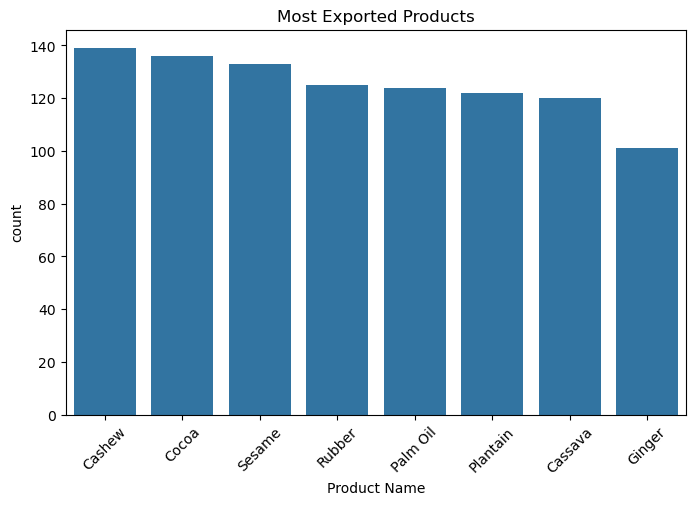

In [30]:
# Plot top products by export count
plt.figure(figsize=(8,5))
sns.countplot(x="Product Name", data=data, order=data["Product Name"].value_counts().index)
plt.title("Most Exported Products")
plt.xticks(rotation=45)
plt.show()



# Cashewnut is the most frequently exported product, followed by Cocoa, Sesame, Rubber, and Palm Oil.
# Ginger has the lowest export count among the products.
# This indicates Cashewnut is the dominant product in terms of export frequency,
# while Ginger is relatively less exported and may require further investigation.


Which products contribute the most to the total export value?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3440\1440692472.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Product Name", y="Export Value", data=data, estimator=sum, ci=None)


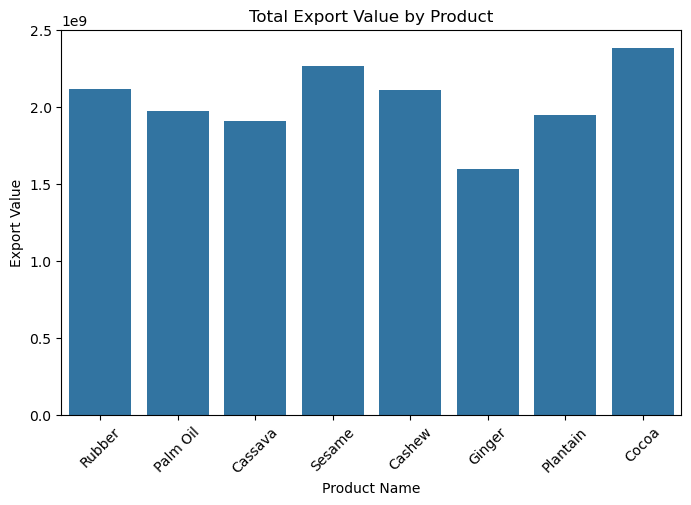

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x="Product Name", y="Export Value", data=data, estimator=sum, ci=None)
plt.title("Total Export Value by Product")
plt.xticks(rotation=45)
plt.show()

# This bar chart displays the total export value for each product.
# Cocoa leads with the highest total export value, followed by Sesame and Rubber.
# Despite differences in export counts, the export value highlights the economic importance of each product.
# This helps identify which products contribute most to overall export revenue.


Which countries have the highest number of export shipments?

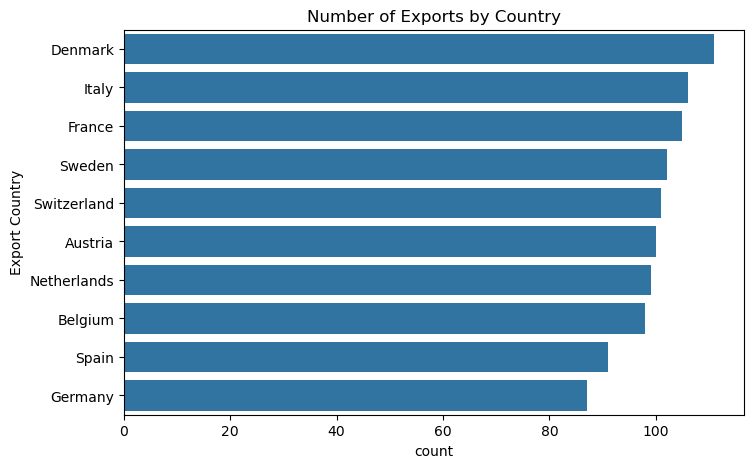

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(y="Export Country", data=data, order=data["Export Country"].value_counts().index)
plt.title("Number of Exports by Country")
plt.show()

Denmark is the top export destination by number of shipments, followed by Italy, France, and Sweden. Interestingly, Germany appears as the country with the fewest export shipments in this dataset. This insight helps prioritize markets with the highest export activity.

How does the total export value change over time, and when are the peak export periods?

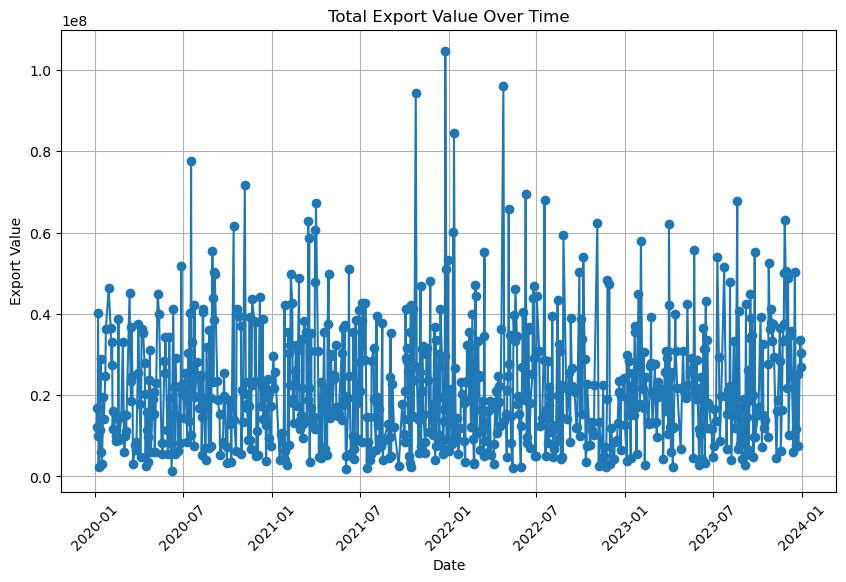

In [ ]:


# Aggregate export value by date
export_over_time = data.groupby('Date')['Export Value'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(export_over_time['Date'], export_over_time['Export Value'], marker='o')
plt.title('Total Export Value Over Time')
plt.xlabel('Date')
plt.ylabel('Export Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The highest peaks in export value occur around January 2022 and July 2022.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns




In [54]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Product Name', 'Company', 'Export Country', 'Transportation Mode']

# Apply label encoding
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Confirm changes
data.head()


,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,6,3,0,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,0
1,4,8,4,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,0
2,1,3,4,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,0
3,6,7,1,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,0
4,7,6,3,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,0


In [55]:
# Features
X = data[['Product Name', 'Company', 'Export Country', 'Transportation Mode', 'Units Sold', 'unit_price']]

# Target
y = data['Export Value']


In [56]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print(X_train.shape, X_test.shape)


(800, 6) (200, 6)


In [57]:
# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Print evaluation metrics
print(f'Linear Regression R² Score: {r2_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')


Linear Regression R² Score: 0.91
MAE: 2206192.39
MSE: 8742333524552.91
RMSE: 2956743.74


 
The Linear Regression model explains 91% of the variance in export value (R² = 0.91), indicating a strong fit to the data.
The average prediction error (MAE) is about 2.2 million units, and the typical deviation (RMSE) is around 2.95 million units.
These error values show the model predicts export values reasonably well, though there is room for improvement with more advanced models.


In [58]:
# Initialize and fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

r2_rf   = r2_score(y_test, y_pred_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest R² Score:   {r2_rf:.2f}')
print(f'MAE:                       {mae_rf:.2f}')
print(f'MSE:                       {mse_rf:.2f}')
print(f'RMSE:                      {rmse_rf:.2f}')


Random Forest R² Score:   1.00
MAE:                       349298.98
MSE:                       238996549716.27
RMSE:                      488872.73



The Random Forest model achieves a near-perfect fit with an R² score of 1.00, meaning it explains almost all the variance in export value.
Its Mean Absolute Error (MAE) is approximately 349,299 units, and the Root Mean Squared Error (RMSE) is about 488,873 units, which are significantly lower than the Linear Regression errors.
This indicates the Random Forest model predicts export values much more accurately, making it a strong choice for this dataset.


In [59]:
# Initialize and fit Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)

r2_gb   = r2_score(y_test, y_pred_gb)
mae_gb  = mean_absolute_error(y_test, y_pred_gb)
mse_gb  = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f'Gradient Boosting R² Score:   {r2_gb:.2f}')
print(f'MAE:                          {mae_gb:.2f}')
print(f'MSE:                          {mse_gb:.2f}')
print(f'RMSE:                         {rmse_gb:.2f}')


Gradient Boosting R² Score:   1.00
MAE:                          453775.65
MSE:                          351609746229.62
RMSE:                         592966.90


The Gradient Boosting model also achieves an excellent fit with an R² score of 1.00, indicating it captures almost all variance in the export value.
Its MAE is around 453,776 units and RMSE is approximately 592,967 units, which are higher than Random Forest but still much lower than Linear Regression errors.
This means Gradient Boosting is highly accurate, though slightly less precise than Random Forest on this dataset.
